## New Programming Techniques

In the previous notebook, we talked about some of the fundamental techniques in programming. Now we're going to throw in a few more. Today we'll be using the Python library `numpy` to make **arrays**. Arrays are exactly like lists, except they have a few cool things you can do with them. To use `numpy`, we'll import it using the line;

```python
import numpy as np
```

This line of code allows us to call any of the functions in `numpy` using the call-sign `np`. To call a function, we'd write `np.function()`. 

The main function we'll be using from `numpy` is called `linspace()` which creates arrays of evenly spaced points. `linspace()` takes in three arguments: the starting value of the array `start`, the ending value of the array `end`, and the number of points in the array `num`. The function then returns an array whose first element is `start` and whose final element is `end` and contains `num` evenly spaced points.

Before we start the physics, try and create an array with `100` points that starts at `0` and ends at `99` using `np.linspace(start, end, num)`. Print out the array after you're done.

In [1]:
# import the numpy package


# define and create your array

# print your array


## Shape of Orbits in the Schwarzschild Geometry
Now on to the physics. This is a Jupyter Notebook to compute and display the shapes of orbits in a Schwarzschild geometry. We're going to be computing the possible orbits of a particle around a black-hole-esque object. Note that the Schwarzschild radial coordinate is measured in units of $M$ so that $M=1$ in the following formulae. Throughout the variable $u = 1/r$ is used. Here is a list of what you must set to run the program:

1. The angular momentum: $\ell$
2. The energy parameter: $\epsilon = (e^2 - 1) / 2$
3. The starting radius for an orbit which is not bound: *rst.*
4. The number of orbits to be computed if the orbit is bound: *norbit*
5. `signewt`, a parameter which turns GR on (`signewt = 1.0`) or off (`signewt = 0.0`)

These are set by editing the definition statements at various places in the program **You must be sure these parameters are set so the orbit is classically allowed and doesn't tart at a position where the value of the effective potential is grater than $\epsilon$**.

We'll run through all the basics of this program, and then we'll mess around with the paramters to see what's up with different values of energy and angular momentum.

Specifically, we're going to use the program to investigate bound orbits (like planets), orbits that fall into the black-hole-eque object, and unbound orbits.

### The Potential
When we work with orbits, we typically use a function called the *effective potential* which is a function that can be used to calculate orbits. It basically takes the angular momentum and the gravitational potential energy and wraps them up into a single potential function. The effective potential comes from looking at the total energy of the particle and subtracting the kinetic term.

The effective potential for radial motion $V_{eff}$ is here denoted simply by $V$. To be slightly more general, a parameter **signewt** is introduced which multiplies the non-Newtonian $1/r^2$ term in the potential. Set it equal to $1$ for general relativity or $0$ for a Newtonian $1/r$ potential. The functional form of the potential is shown below.

$$ V = -u + \frac{\ell^2 u^2}{2} - \text{signewt} \ell^2 u^3 $$

To get started, in the two boxed below define a value of `signewt` and then define a function which takes in `u` and `ell` ($\ell$) and returns the effective potential $V$.

In [130]:
# define signewt


In [2]:
# define the effective potential



### Specifying the Orbit
It takes four numbers to specify an orbit: (1) angular momentum $\ell$, (2) energy $\epsilon$, (3) starting radius $rst$, and (4) the number of orbits to be calculated $norbit$.

Let's specify the angular momentum below. Try defining a variable `ell` for angular momentum as equal to `5.0`.

In [134]:
# define the angular momentum ell


Now we plot the effective potential as a function of $r / M$ for the specified value of $\ell$. Use bounds on the radius of $[2, 80]$ and $1000$ points. Remember that we've implicitly define $M = 1$.

In the box below define an array of $r$ values and then find the corresponding $V$ values. Finally plot these values using `plt.plot()`. Make sure you first import `matplotlib.pyplot` as `plt`.

In [3]:
# import matplotlib.pyplot


# define an rvals array using linspace

# recall that M is defined to be 1
# define a Vvals array to be the same size as the rvals array using the np.size(rvals) function


# define a for loop that defines each value of Vvals using the function you defined above


    
# create a plot of the Vvals vs rvals






Now we want to find the values of the potential at the extrema. To do this, define a function `dV` which gives the derivative of $V$ at a given piont. Define `dV` as a function of `u = 1/r` and then plot the function for the values of `r` given above.

In [4]:
# Define the derivative function


# create an empty array dVvals for derivative values


# write a for loop that calculates all the values for the dVvals array



# plot the values of dVvals vs rvals







Now we are going to use this to solve for the extrema using a python package function called `opt.fsolve(function, [initial guesses])`. We need to give `fsolve` some initial guesses which we can take from the plot of $dV$ above. Remember that `dV` is plotted against $r$ but takes $1/r$ as an argument, so our guesses need to be in terms of $1/r$. Using the format above, find the u coordinates of the extrema and print them out. You'll need to use the line `maxmin = opt.fsolve(dV, uguess)` where `uguess` is a list of two values you can guess from your plot above.

In [5]:
# make an array uguess = np.array([guess1, guess2]) using the plot above

# use the opt.fsolve() function to solve for the extrema


# print the extrema


Now that we've found the extrema $u$ values, we can find the actual extreme values of $V$. Use the function `V` defined above and the `maxmin` values you found to define and then print the extreme values of $V$. Do these things in the box below.

In [6]:
# use your V function to calculate the V values of the extrema



# print the extrema


Now we are going to specify the energy of an orbiting object. In order to have a classically allowed orbit, the energy parameter must be larger than the minimum value of $V$ you found above. We also want the orbit to be bound, so we need to have the energy by less than $0$.

In the box below, define a new variable `epsilon` for the energy that has a physically appropriate value.

In [7]:
# define a value for the energy epsilon


To check that we have appropriate values for energy, let's plot the values of `V` and the value of `epsilon` below. You can use the same plot code for `V` from above, you'll just need to add in a plot line which plots the constant `epsilon`.

In [8]:
# use your plot from above to complete this
# make sure you plot an extra line for the value of epsilon

# recall that M is defined to be 1


You should be able to see with this plot that $V$ will intersect the constant `epsilon` at three points. These are our three points of interest, so let's use the same `fsolve` function from above to find where these intersections occur.

Importantly, `fsolve` finds where a function is equal to zero. What change do we need to make to $V$ to use `fsolve` to find intersections with `epsilon`? Define a new function `V_adjusted` as a function of `u` which will serve this purpose.

After you've defined this function, use `fsolve` and an array of three guesses to find the points of intersection. Then print out these points.

In [9]:
# define a new function V_adjusted(u) which spits out V(u, ell) - epsilon



# guess the solutions in an array uguess = np.array([guess1, guess2])

# use opt.fsolve() to solve for the solutions

# print the solutions for u

# print the solutions for r = 1 / u


We've now specified the angular momentum and the energy. Next we'll specify a starting radius for our orbiting particle. Here we'll want to use a starting radius of $20.0$, so in the box below, define a starting radius `rst` equal to $20.0$ and then a corresponding initial value of $u$, `ust`.

In [10]:
# define rst as 20.0

# define ust = 1 / rst


Finally, we need to define the last needed parameter for our program, `norbits`. We need to calculate at least 2 orbits to see that the orbit is actually an orbit, so let's just go ahead and say 3. Define a new variable `norbits` below, and set it equal to 3.

In [11]:
# define a number of orbits norbit as something near 3


### Computing the Schwarzschild Orbits for Our Particle

The following bits of code uses a bit more background than you've got from the two hours you've been programming, so a lot of them will be predefined for you.

Now we are going to numerically determine the orbit of our particle around a black-hole-eque object. We will be performing the following integral:

$$ \int \frac{\ell}{\sqrt{2(\epsilon - V)}} du$$

Notice that when $\epsilon = V$ the integrand diverges. To dodge this problem, we'll define a parameter $eps$ which will determine how close the integrand can get to this divergent part.

In [12]:
# define a value for eps as 1.0e-8


Next we need to write a program that picks the appropriate radii to start and end the integration of the orbit given the energy and starting radius defined above. There are are four types of orbits:

1. Bound orbits which start at the outer turning point.
2. Orbits which come in from infinity and go out again. These start at rst.
3. Orbits which start close to $r = 2M$ (the Schwarzschild radius) and fall back to it.
4. Plunge orbits which start at rst and end at $r = 2M$.

The following lines test what type of orbit we are dealing with.

In [13]:
# you get these for free
if epsilon < 0 and ust < intersections[1]:
    print('Case 1')
    u1 = intersections[2] * (1 + eps)
    u2 = intersections[1] * (1 - eps)
    
elif epsilon > 0 and epsilon < Vmax and ust < intersections[1]:
    print('Case 2')
    u1 = ust
    u2 = intersections[1] * (1 - eps)

elif epsilon > Vmax and ust > intersections[2]:
    print('Case 3')
    u1 = 0.5
    u2 = intersections[0] * (1 + eps)

elif epsilon > Vmax:
    print('Case 4')
    u1 = ust
    u2 = 0.5 * (1 - eps)
    
print(u1, u2)

NameError: name 'epsilon' is not defined

Next we are going to define a function which integrates the angle `theta` swept out from the innermost turning point of the particle orbit. This function utilizes a numerical integration function within python.

In [146]:
# define a function called integrand(u, ell, epsilon) that returns the inside of the integral above



# you get this one for free too. It's just some integration
def theta(u, epsilon, ell, u1):
    return integrate.quad(integrand, u1, u, args=(ell, epsilon))[0]

Now we define a variable `delphi` which is the total angle `theta` swept out bewteen two endpoints of the orbit.

Use the function `theta` above and the parameters for `epsilon, u2, ell, and u1` defined above to define and find `delphi` in the box below. Print out the value you find.

In [147]:
# you get this for free
delphi = theta(u2, epsilon, ell, u1)
print(delphi)

3.7364007962032155


Now we're going to define some new functions.

In [148]:
# write a function that returns the rounded integer of a float z



# write a function that returns the decimal of an integer z



# you get all the rest of these for free
def ua(z):
    return u1 * (1 - 2 * zf(z)) + u2 * 2 * zf(z);

def ub(z):
    return u1 * (2 * zf(z) - 1) + 2 * u2 * (1 - zf(z));

def u(z):
    if zf(z) < 0.5:
        return ua(z);
    else:
        return ub(z);

def phia(z):
    return 2 * n(z) * delphi + theta(u(z), epsilon, ell, u1);

def phib(z):
    return 2 * (n(z) + 1) * delphi - theta(u(z), epsilon, ell, u1);

def accphi(z):
    if zf(z) < 0.5:
        return phia(z);
    else:
        return phib(z);

def xpoints(z):
    return np.cos(accphi(z)) / u(z);

def ypoints(z):
    return np.sin(accphi(z)) / u(z);

### Displaying Orbits

`accphi` defined above is the accumulated angle as a function of position along the orbit, as measured by the parameter z (also define above) to vary from `0` to `norbit` so that $z=1$ is the end of the first orbit, $z=2$ is the end of the second orbit, etc..

Below, write an if statement that will define `norbit` to be equal to `norbit` if the orbit is bound (use the if statement for case 1 above) and set it to `1` if it isn't bound.

In [149]:
# write your if statement



# write the else part of the statement



Now write an if statement which defines `norbit` to `0.5` if the orbit is a plunge orbit. Again you can use the if statement from Case 4 from above.

In [150]:
# write your if statement



Finally, write an if statement which will plot `accphi(z)` from z=0 to z=1 if `norbit` is greater than `1.0`.

In [14]:
# write an if statement that will plot accphi(x) from z=0 to z=1 with 1000 points if norbit is greater than 1.0

    # define your zvals array with 100 points
    
    # define an empty accvals array
    
    # write a for loop that calculated each value of accvals
    
    
    # plot accvals vs zvals
    
    
    
    
    

Now make a plot of `accphi` from `z=0` to `z = norbit - 1e-6`.

In [15]:
# do the same thing as above but from z=0 to z=norbit with 10000 points (this might take a minute to run)


    

    
    
    
    


Calculating and plotting the orbit: Two parameters specify how accurately the orbit is calculated: `PlotDivision` specifies the number of plot points, `MaxBend` specifies the maximum bending angle permitted.

For shorter calculations and rougher orbits decrease `PlotDivision` and increase `MaxBend`. For longer calculations and more accurate orbits, increase `PlotDivision` and decrease `MaxBend`.

The final step here is to plot the orbits actual positions rather than angular positions. 

Write some code that plots `xpoints` and `ypoints` for the z values defined above.

In [16]:
# use the functions xpoints() and ypoints() defined above to fill in arrays xvals and yvals
# define empty arrays xvals and yvals that have the same number of elements as zvals



# write a for loop that fills in xvals and yvals using xpoints() and ypoints()




/Users/wentmich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


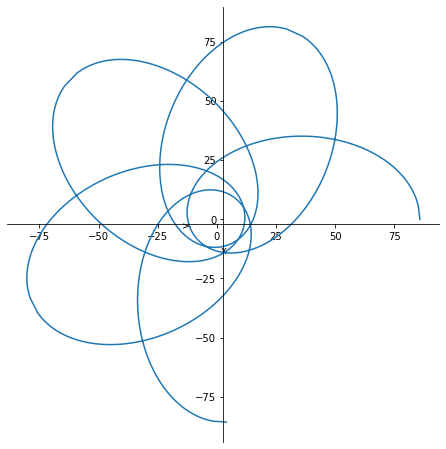

In [154]:
# write some code that will plot xvals and yvals against each other. Some of this code is given to make the
# plots look pretty

############### free ##########################
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
############### free ##########################

# write your plot functions


############### free ##########################
plt.axes().set_aspect('equal')
############### free ##########################




Now that we've written all of the code and gotten a grasp on the necessary parameters, it's easy to study many different types of orbits. Go back and change some of the parameters to see what types of orbits you can get.

1. Make an unbound orbit. What parameters do you need to change?
2. Make an orbit that falls into the black-hole-esque object. What parameters do you need to change?
3. Make a closed orbit with Newtonian gravity and with GR gravity. What parameters do you need to change? What do you see that's strange?